## Initialization

In [2]:
import numpy as np
from scipy.stats import kstest, norm, expon, pareto
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## 1) Exercsie 4.1 - Blocking System (Poisson)

Mean: 0.1219
95% confidence interval: (0.1215, 0.1223)
Analytical Solution: 0.1217
Difference in Analytical and simulated mean: 0.0002492357470485068


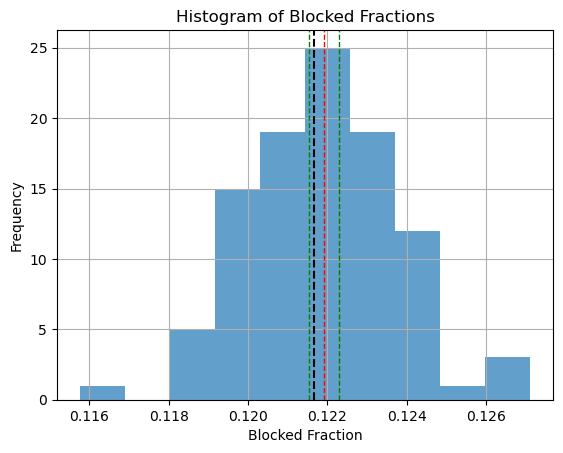

In [3]:
# Parameters
m = 10                  
mst = 8   
mtbc = 1 
N = 100000  
n= 100    

# set seed
np.random.seed(123)

def Exp_service_time(mst):
    return np.random.exponential(mst)

# Function to run a single simulation 
def Run_Poisson_Sim(m,mst,mtbc,n,N,service_dist):
    """
    Runs a simulation of a blocking system with m service units.
    
    Input: 
    m = Service units 
    mst = Mean Service time 
    mtbc = mean time between customers
    n = Number of simulations 
    N = number of customers

    Output: 
    - Returns the fraction of blocked customers 
    """
    blocked_fractions = []
    
    for _ in range(n):
        # Initialize parameters 
        t = 0
        blocked_customers = 0
        busy_until = [0] * m

        # loop over number of customers 
        for _ in range(N):
            # Generate next arrival time
            t += np.random.exponential(mtbc)
            
            # Check for an available server
            available_server = -1
            for i in range(m):
                if busy_until[i] <= t:
                    available_server = i
                    break
            
            if available_server == -1:
                # All servers are busy
                blocked_customers += 1
            else:
                # Assign the customer to the available server
                service_time = service_dist()
                busy_until[available_server] = t + service_time
        blocked_fractions.append(blocked_customers / N)
    
    mean = np.mean(blocked_fractions)
    std= np.std(blocked_fractions)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std / np.sqrt(n))

    return blocked_fractions, mean, conf_int

def Erlang_B(A,m):
    # Analytical calculation using Erlang's B-formula
    return A**m / math.factorial(m)/ sum(A**i / math.factorial(i) for i in range(m + 1))

generator = lambda: Exp_service_time(mst)
# Run simulations
blocked_fractions_1,mean_1, conf_int_1 = Run_Poisson_Sim(m,mst, mtbc,n,N,generator) 

# Analytical calculation using Erlang's B-formula
A = 8  
B = Erlang_B(A,m)

# Print results
print(f"Mean: {mean_1:.4f}")
print(f"95% confidence interval: ({conf_int_1[0]:.4f}, {conf_int_1[1]:.4f})")
print(f"Analytical Solution: {B:.4f}")
print(f"Difference in Analytical and simulated mean: {np.abs(mean_1-B)}")

# Plot results
plt.hist(blocked_fractions_1, bins=10, alpha=0.7)
plt.axvline(mean_1, color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_1[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_1[1], color='g', linestyle='dashed', linewidth=1)
plt.axvline(B, color='black', linestyle='dashed', linewidth=1.5)
plt.title('Histogram of Blocked Fractions')
plt.xlabel('Blocked Fraction')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## 1) Exercsie 4.2a - Blocking System (Erlang)

Mean: 0.0928
95% confidence interval: (0.0925, 0.0931)
Analytical Solution: 0.1217


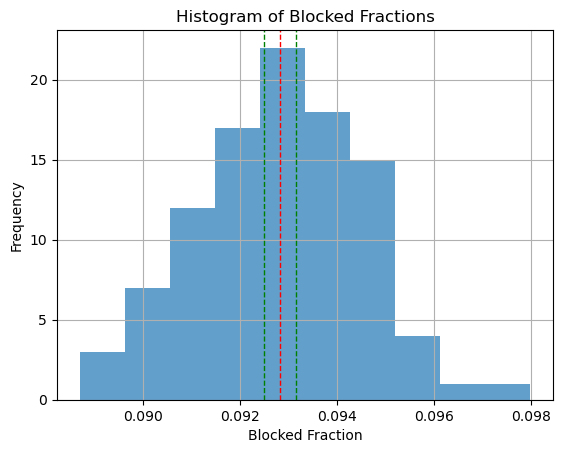

In [4]:

#Function for Erlang distribution
def erlang_interarrival(k, mean):
    scale = mean / k
    return np.random.gamma(k, scale)


# Function to run a single simulation with a given inter-arrival time generator
def Run_Erlang_Sim(m,mst,mtbc,n,N):
    blocked_fractions = []
    # Erlang distributed inter-arrival times
    k = 2  # Shape parameter for Erlang distribution
    mean_interarrival = 1  # Mean inter-arrival time

    for _ in range(n):
        t = 0
        blocked_customers = 0
        busy_until = [0] * m

        for _ in range(N):
            # Generate next arrival time
            t += erlang_interarrival(k,mean_interarrival)
            
            # Check for an available server
            available_server = -1
            for i in range(m):
                if busy_until[i] <= t:
                    available_server = i
                    break
            
            if available_server == -1:
                # All servers are busy
                blocked_customers += 1
            else:
                # Assign the customer to the available server
                service_time = np.random.exponential(mst)
                busy_until[available_server] = t + service_time
        blocked_fractions.append(blocked_customers / N)

    mean = np.mean(blocked_fractions)
    std = np.std(blocked_fractions)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std / np.sqrt(n))

    return blocked_fractions, mean, conf_int

# Run simulations
blocked_fractions_2a,mean_2a, conf_int_2a = Run_Erlang_Sim(m,mst, mtbc,n,N) 

# Print results
print(f"Mean: {mean_2a:.4f}")
print(f"95% confidence interval: ({conf_int_2a[0]:.4f}, {conf_int_2a[1]:.4f})")
print(f"Analytical Solution: {B:.4f}")

# Plot results
plt.hist(blocked_fractions_2a, bins=10, alpha=0.7)
plt.axvline(mean_2a, color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_2a[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_2a[1], color='g', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blocked Fractions')
plt.xlabel('Blocked Fraction')
plt.ylabel('Frequency')
plt.grid()
plt.show()


## 1) Exercsie 4.2b - Blocking System (Hyper Exponential)

Mean: 0.1386
95% confidence interval: (0.1381, 0.1390)
Analytical Solution: 0.1217


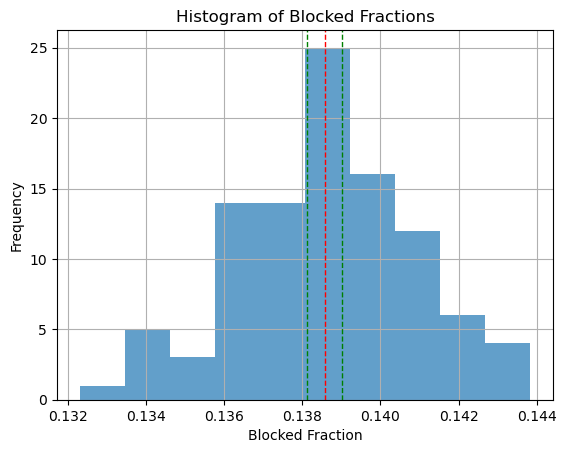

In [5]:
#Function for hyper exponential distribution
def hyperexponential(p1, lambda1, p2, lambda2):
    if np.random.rand() < p1:
        return np.random.exponential(1/lambda1)
    else:
        return np.random.exponential(1/lambda2)

# Function to run a single simulation with a given inter-arrival time generator
def Run_hyperExp_Sim(m,mst,mtbc,n,N):
    blocked_fractions = []

    # Hyper-exponential distributed inter-arrival times
    p1, lambda1 = 0.8, 0.8333
    p2, lambda2 = 0.2, 5.0

    for _ in range(n):
        t = 0
        blocked_customers = 0
        busy_until = [0] * m

        for _ in range(N):
            # Generate next arrival time
            t += hyperexponential(p1, lambda1, p2, lambda2)
            
            # Check for an available server
            available_server = -1
            for i in range(m):
                if busy_until[i] <= t:
                    available_server = i
                    break
            
            if available_server == -1:
                # All servers are busy
                blocked_customers += 1
            else:
                # Assign the customer to the available server
                service_time = np.random.exponential(mst)
                busy_until[available_server] = t + service_time
        blocked_fractions.append(blocked_customers / N)

    mean = np.mean(blocked_fractions)
    std = np.std(blocked_fractions)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std / np.sqrt(n))

    return blocked_fractions, mean, conf_int

# Run simulations
blocked_fractions_2b,mean_2b, conf_int_2b =Run_hyperExp_Sim(m,mst, mtbc,n,N) 

# Print results
print(f"Mean: {mean_2b:.4f}")
print(f"95% confidence interval: ({conf_int_2b[0]:.4f}, {conf_int_2b[1]:.4f})")
print(f"Analytical Solution: {B:.4f}")

# Plot results
plt.hist(blocked_fractions_2b, bins=10, alpha=0.7)
plt.axvline(mean_2b, color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_2b[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(conf_int_2b[1], color='g', linestyle='dashed', linewidth=1)
plt.title('Histogram of Blocked Fractions')
plt.xlabel('Blocked Fraction')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## PLots of exercise 2

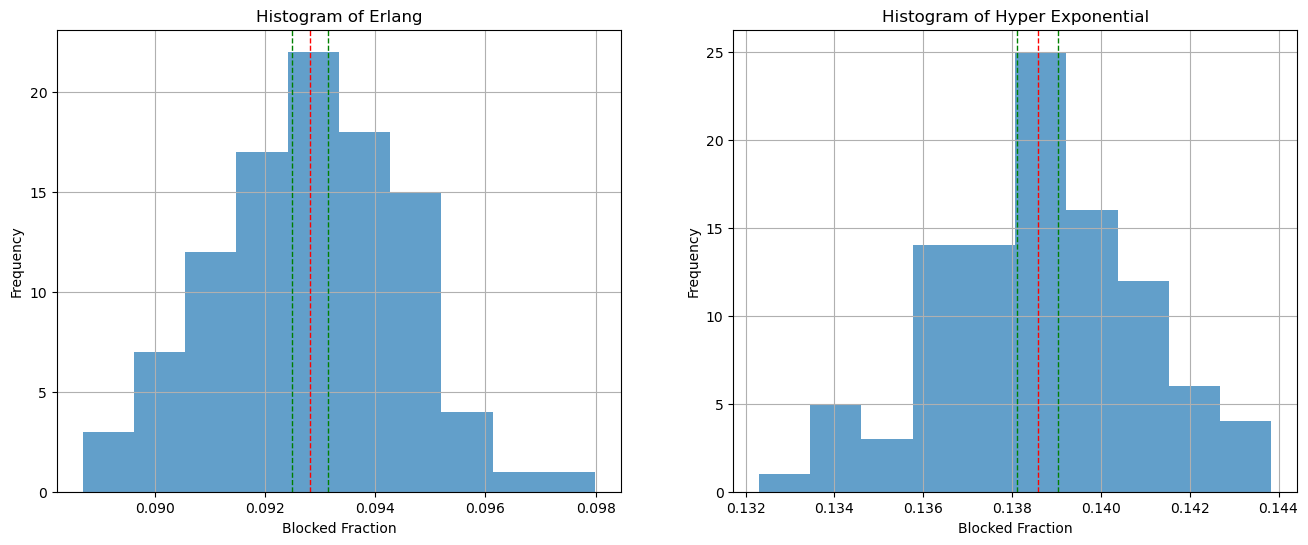

In [10]:

figure, axis = plt.subplots(1, 2,figsize=(16, 6)) 

# Plot results
axis[0].hist(blocked_fractions_2a, bins=10, alpha=0.7)
axis[0].axvline(mean_2a, color='r', linestyle='dashed', linewidth=1)
axis[0].axvline(conf_int_2a[0], color='g', linestyle='dashed', linewidth=1)
axis[0].axvline(conf_int_2a[1], color='g', linestyle='dashed', linewidth=1)
axis[0].set_title('Histogram of Erlang')
axis[0].set_xlabel('Blocked Fraction')
axis[0].set_ylabel('Frequency')
axis[0].grid()


# Plot results
axis[1].hist(blocked_fractions_2b, bins=10, alpha=0.7)
axis[1].axvline(mean_2b, color='r', linestyle='dashed', linewidth=1)
axis[1].axvline(conf_int_2b[0], color='g', linestyle='dashed', linewidth=1)
axis[1].axvline(conf_int_2b[1], color='g', linestyle='dashed', linewidth=1)
axis[1].set_title('Histogram of Hyper Exponential')
axis[1].set_xlabel('Blocked Fraction')
axis[1].set_ylabel('Frequency')
axis[1].grid()



## 1) Exercsie 4.3 - Poisson Process with Different service time distributions

Constant service time:
  Mean fraction of blocked customers: 0.1214
  95% confidence interval: (0.1211, 0.1217)
Pareto (k=1.05) service time:
  Mean fraction of blocked customers: 0.0032
  95% confidence interval: (0.0026, 0.0037)
Pareto (k=2.05) service time:
  Mean fraction of blocked customers: 0.1217
  95% confidence interval: (0.1212, 0.1221)
Uniform service time:
  Mean fraction of blocked customers: 0.1216
  95% confidence interval: (0.1213, 0.1220)
Log-normal service time:
  Mean fraction of blocked customers: 0.1217
  95% confidence interval: (0.1213, 0.1222)


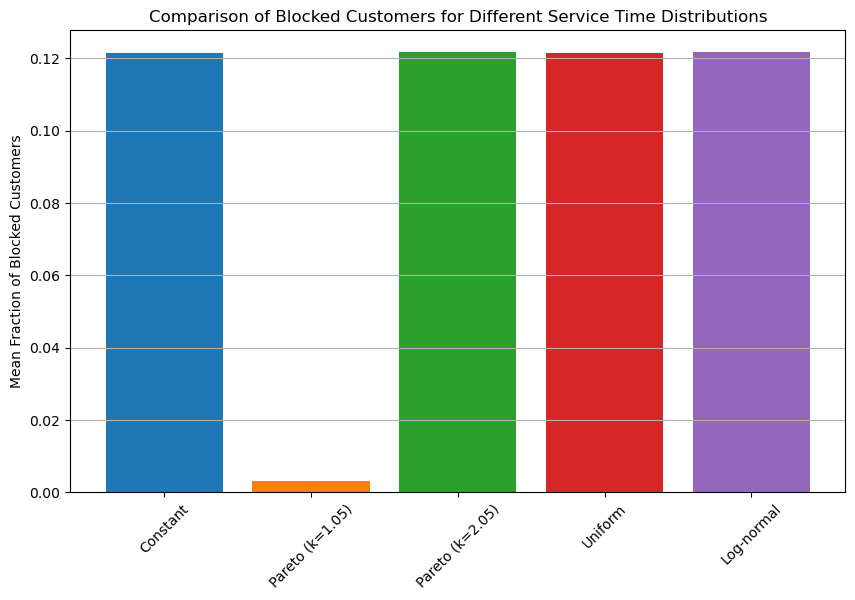

In [12]:
# Service time generators
def constant_service_time():
    return mst

def pareto_service_time(k):
    xm = (mst * (k - 1)) / k  # Scale parameter to match mean service time
    return (np.random.pareto(k) + 1) * xm

def uniform_service_time():
    return np.random.uniform(0, 2 * mst)

def lognormal_service_time():
    sigma = 1.0  # standard deviation
    mu = np.log(mst) - 0.5 * sigma**2  # mean of log-normal
    return np.random.lognormal(mu, sigma)

# Run simulations for different service time distributions
distributions = {
    'Constant': constant_service_time,
    'Pareto (k=1.05)': lambda: pareto_service_time(1.05),
    'Pareto (k=2.05)': lambda: pareto_service_time(2.05),
    'Uniform': uniform_service_time,
    'Log-normal': lognormal_service_time
}

results = {}
for name, generator in distributions.items():
    blocked_fractions_3,mean_3, conf_int_3 = Run_Poisson_Sim(m,mst, mtbc,n,N,generator) 
    results[name] = (mean_3, conf_int_3)

# Print results
for name, (mean_fraction, ci) in results.items():
    print(f"{name} service time:")
    print(f"  Mean fraction of blocked customers: {mean_fraction:.4f}")
    print(f"  95% confidence interval: ({ci[0]:.4f}, {ci[1]:.4f})")

# Plot results
plt.figure(figsize=(10, 6))
for name, (mean_fraction, ci) in results.items():
    plt.bar(name, mean_fraction, capsize=5)

plt.ylabel('Mean Fraction of Blocked Customers')
plt.title('Comparison of Blocked Customers for Different Service Time Distributions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Comparing Confidence intevals

In [16]:
print('Exercise 1')
print(np.round(conf_int_1,5))
print(' ')

print('Exercise 2a')
print(np.round(conf_int_2a,5))
print(' ')
print('Exercise 2b')
print(np.round(conf_int_2b,5))
print(' ')

print('Exercise 3')
for name, (mean_fraction, ci) in results.items():
    print(np.round(ci,5))


# Tydeligt at for poisson arrival time er der meget lille forskel på conf inteval. Det er lidt ligegyldigt
#  hvilken service time distribution man vælger 

# det ses også at forskellige arrival dist set i opgave 2a og 2b gør en significant forskel. 

# af opgave 3 ses det at pareto med 1.05 er vanvitig god (men er den realistisk)


Exercise 1
[0.12154 0.12228]
 
Exercise 2a
[0.09249 0.09315]
 
Exercise 2b
[0.13812 0.13903]
 
Exercise 3
[0.12112 0.12174]
[0.00258 0.00375]
[0.12122 0.12213]
[0.1213  0.12196]
[0.1213  0.12215]
